## Wine Quality
https://www.kaggle.com/datasets/rajyellow46/wine-quality?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.io import loadmat
from utils.utils_gmm import *
from sklearn.preprocessing import MinMaxScaler


sns.set_style('darkgrid')

SEED = 42

np.random.seed(SEED)
sns.set()

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Load Data

In [3]:
df = pd.read_csv("data/winequalityN.csv").dropna()
def category(x):
    
    if x <=4:
        return "outlier"
    elif x>= 8:
        return "inlier"
    else:
        return "outlier"
    
df['category'] = df['quality'].apply(category)
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,outlier
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,outlier
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,outlier
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,outlier
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,outlier


,fixed acidity,volatile acidity,chlorides,density,alcohol,quality,category
0,7.0,0.27,0.045,1.0010,8.8,6,outlier
1,6.3,0.30,0.049,0.9940,9.5,6,outlier
2,8.1,0.28,0.050,0.9951,10.1,6,outlier
3,7.2,0.23,0.058,0.9956,9.9,6,outlier
4,7.2,0.23,0.058,0.9956,9.9,6,outlier


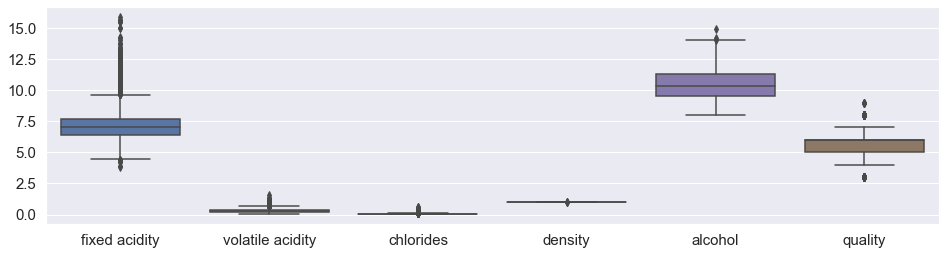

In [13]:
plt.figure(figsize = (16, 4))

c_interest = ['fixed acidity', 'volatile acidity', 'chlorides',
                     'density', 'alcohol', 'quality', 'category']

df = df[c_interest]

sns.boxplot(data=df)
df.head(5)

In [14]:
# extraxt features and target
Y = df["category"]
Y = (Y == "inlier").astype("int").values

X = df.values[:, :-2]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Y.shape, X_scaled.shape

((6463,), (6463, 5))

In [16]:
unique, counts = np.unique(Y, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6266],
       [   1,  197]], dtype=int64)

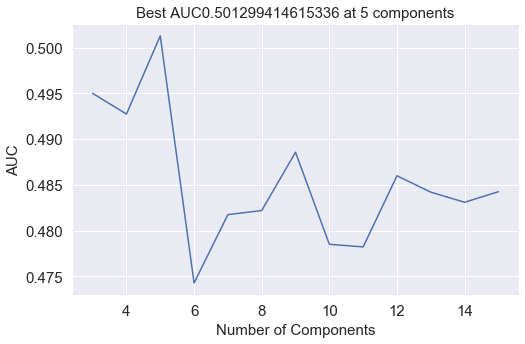

In [15]:
#find best components
aucs = gridsearch_n(X, Y, min_n=3, max_n=15, plot=True, SEED=SEED)

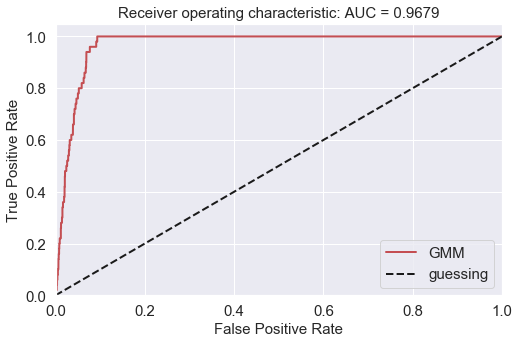

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,score,label
2733,7.8,0.965,0.6,65.8,0.074,8,160,1.03898,3.39,0.69,11.7,124.358159,0
4671,6.1,0.26,0.25,2.9,0.047,289,440,0.99314,3.44,0.64,10.5,56.976009,0
1488,14.2,0.27,0.49,1.1,0.037,33,156,0.992,3.15,0.54,11.1,32.893756,0
719,7.4,0.2,1.66,2.1,0.022,34,113,0.99165,3.26,0.55,12.2,24.900153,0
4844,15.5,0.645,0.49,4.2,0.095,10,23,1.00315,2.92,0.74,11.1,24.715932,1
3095,7.6,0.25,1.23,4.6,0.035,51,294,0.99018,3.03,0.43,13.1,23.333607,0
1380,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.0001,3.04,0.63,11,23.326618,0
469,6.2,0.37,0.3,6.6,0.346,79,200,0.9954,3.29,0.58,9.6,23.019588,0
4718,4.7,0.785,0,3.4,0.036,23,134,0.98981,3.53,0.92,13.8,21.657444,0
4741,6.2,0.76,0.01,3.2,0.041,18,120,0.99026,3.2,0.94,13.7,21.434165,0


In [63]:
N_COMPONENTS = 3

scores, gm = fit_predict_gm(X, N_COMPONENTS, SEED=SEED)

scored_df = pd.DataFrame(X)
scored_df.columns = df.columns[1:]
scored_df.index = df.index 
scored_df["score"] = scores
scored_df["label"] = Y

plot_roc_curve(scored_df)

sorted_df = scored_df.sort_values(by="score", ascending=False)
sorted_df.head(20)

### Calculate distances per dimension

In [64]:
dist, cs = mah_dist_per_dim(gm, X, sorted_df.index.values)
distances = pd.DataFrame(dist, columns=df.columns[1:])
distances.index = sorted_df.index
distances.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2733,1.993040,1.981571,0.771698,7.841566,0.358854,0.128672,0.454086,17.068895,2.084507,1.712274,4.151677
4671,0.787968,1.175176,0.246299,1.138329,0.185756,10.257090,1.868503,0.795180,1.439187,1.494685,0.735425
1488,7.443419,1.217386,0.814103,2.302176,0.670632,0.396569,0.915488,2.955192,0.327909,0.703578,1.585560
719,0.505143,1.218830,6.040851,1.150685,1.074032,0.263410,0.685871,0.697122,0.785461,0.214560,1.814371
4844,5.432005,1.217852,0.407764,0.942945,0.429977,1.236781,1.225036,2.574850,1.248788,1.009176,1.300293


### Store Results

In [65]:
outlier_idx = sorted_df[sorted_df["label"] == 1].index
outlier_idx = outlier_idx[np.argsort(outlier_idx)]

sorted_df.loc[outlier_idx].to_csv("results/gmm_wine_quality_scored.csv")
distances.loc[outlier_idx].to_csv("results/gmm_wine_quality_distances.csv")

### Examine Results

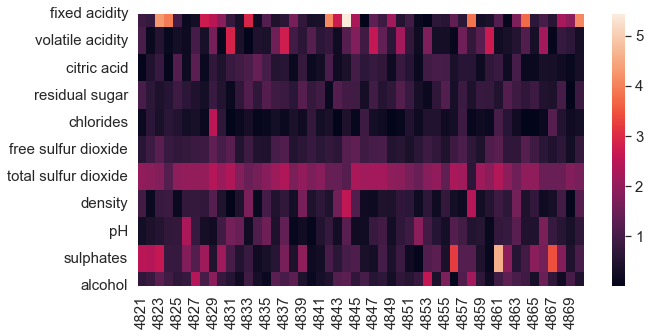

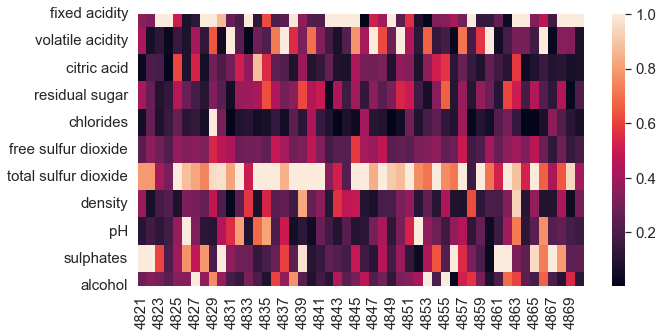

In [66]:
plt.figure(figsize=[10, 5])
sns.heatmap(distances.loc[outlier_idx].T)
plt.show()
plt.figure(figsize=[10, 5])
distances_norm = distances.loc[outlier_idx].T / np.max(distances.loc[outlier_idx].T.values, axis=0)
sns.heatmap(distances_norm.T.head(50).T)

<BarContainer object of 11 artists>

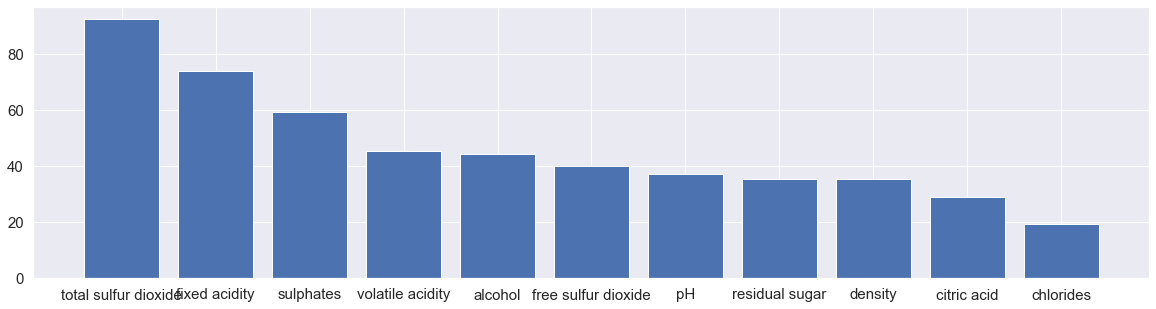

In [67]:
TOP_COLUMNS = 11
plt.figure(figsize=[20, 5])
dist_sum = distances.loc[outlier_idx].sum().sort_values(ascending=False)[:TOP_COLUMNS]
plt.bar(dist_sum.index, dist_sum.values)

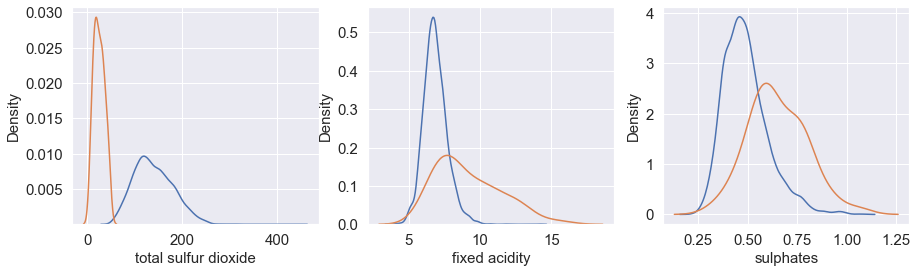

In [68]:
# plot the density estimation for the top 3 feautres for the inlier and outlier class
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, c in zip(axes, dist_sum.index[:3].values):
    sns.kdeplot(data=df[df["type"] == "white"], x=c, ax=ax)
    sns.kdeplot(data=df[df["type"] == "red"], x=c, ax=ax)

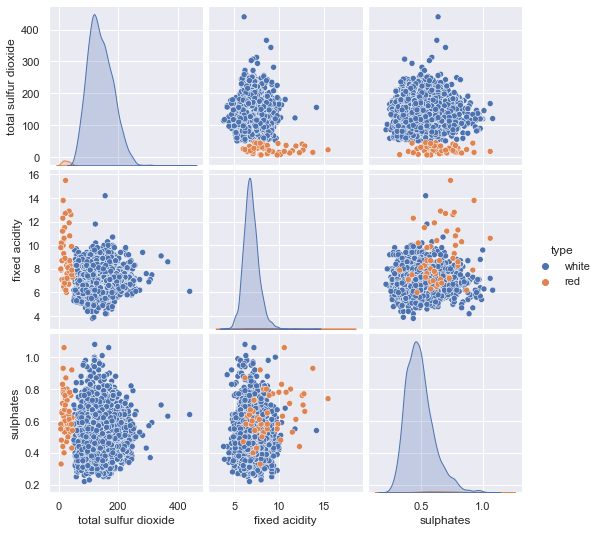

In [11]:
sns.pairplot(df, hue="type", vars=dist_sum.index[:3].values)

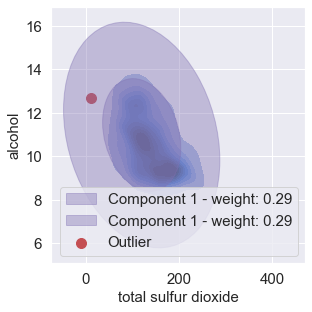

In [117]:
# analyse single outlier

IDX = 4827

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

col_1 = "total sulfur dioxide"
col_2 = "alcohol"

columns = df.columns[1:]
col_1_idx = np.argsort(columns == col_1)[-1]
col_2_idx = np.argsort(columns == col_2)[-1]

#draw_components(gm, [col_1_idx, col_2_idx], ax=ax)
cols = [col_1_idx, col_2_idx]
w_factor = 0.5 / gm.weights_.max()
c = int(cs[IDX])
for idx, (pos, covar, w) in enumerate(zip(gm.means_[[c]][:, cols], gm.covariances_[[c]][:, cols, :][:, :, cols], gm.weights_[[c]])):
        draw_ellipse(pos, covar, alpha=0.4, ax=ax, c="m", nr_patches=3, label=f"Component {c} - weight: {round(w, 2)}")

point = X[IDX][[col_1_idx, col_2_idx]]
dist = distances.loc[IDX][[col_1, col_2]].values / 5


temp = pd.DataFrame(X, columns=columns, index=df.index)
sns.kdeplot(data=temp, x=col_1, y=col_2, ax=ax, fill=True)
ax.scatter(X[IDX][col_1_idx], X[IDX][col_2_idx], c="r", s=100, label="Outlier")
ax.legend(loc="lower right")

fig.tight_layout()
plt.savefig(f"images/gmm_outlier_analyis_{IDX}.svg", bbox_inches="tight")
plt.show()